### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [4]:
sigma = 15  
Z = 1.96
e = 3 #%       

N = ((sigma*Z)/e)**2
N

96.03999999999998

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [19]:
import scipy.stats as stats

population_men=stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

In [20]:
stats.ttest_ind(population_men,population_women)

Ttest_indResult(statistic=0.19268197788405672, pvalue=0.8472080420820118)

In [21]:
from scipy import stats

t , p  = stats.ttest_ind(population_men,population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 0.19268197788405672
p = 0.8472080420820118


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

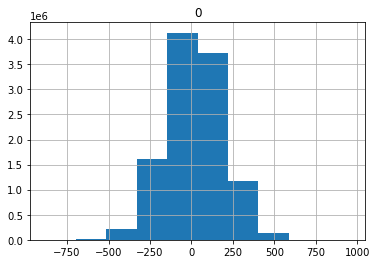

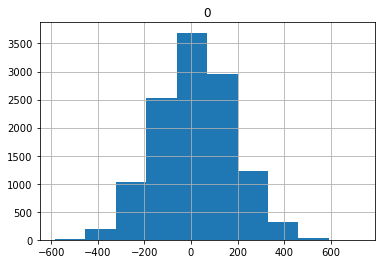

In [22]:
pd.DataFrame(population_men).hist()
pd.DataFrame(population_women).hist()

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [14]:
sigma = 150 
T = 1.96
e = 50 #%       

N = ((sigma*Z)/e)**2
N

34.5744

### 4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [15]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [25]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.
pvalue
### Ваш код...

0.828664440194697

In [37]:
# из лекции знаем что Низкие значения p - это хорошо; Они указывают на то, что ваши данные не были случайными.
#следлвательно можно сказать что эти данные являются случайными 

### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: 
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

In [33]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

a = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


print(mean_confidence_interval(a, 0.9))

(5.843062450077532, 6.4411764705882355, 7.039290491098939)


### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [34]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]
t , p  = stats.ttest_ind(data_1,data_2)
print("t = " + str(t))
print("p = " + str(p))

t = 7.35744682757447
p = 2.1159475572725764e-11


### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

### Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


### Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Найти среднее значение и посмотреть доверительные интервалы, дадее можем посмотреть входит ли это среднее значение в доверительный интервал, если нет то разпределение не нормальоне, если да то нормальное 

### 8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

#### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

#### b) При каком минимальном P-values различия были бы уже значимы? 

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

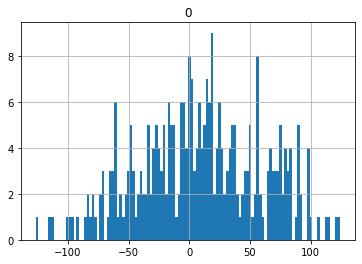

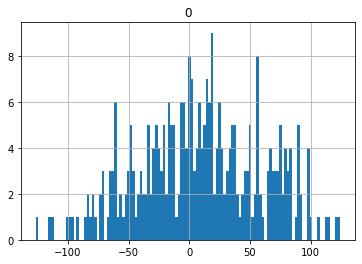

In [52]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

A.mean()
B.mean()
pd.DataFrame(B).hist(bins=120)

In [51]:
stats.ttest_ind(a=A,b=B,equal_var=False)
#7% меньше 5%
# если pvalue меньше пяти то значения значимы

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

In [17]:
from IPython.display import Image
import numpy as np
import pandas as pd
import scipy.stats